Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.8521 - val_accuracy: 0.5000 - val_loss: 1.8553
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5000 - loss: 1.7634 - val_accuracy: 0.5000 - val_loss: 0.7347
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 1.0367 - val_accuracy: 0.5000 - val_loss: 1.2509
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 0.9329 - val_accuracy: 0.5625 - val_loss: 0.6303
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4375 - loss: 0.9006 - val_accuracy: 0.5000 - val_loss: 0.8464
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 1.0152 - val_accuracy: 0.5000 - val_loss: 0.8641
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5625 - loss: 0.7113 - val_accuracy: 0.5000 - val_loss: 0.5337
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6250 - loss: 0.5205 - val_accuracy: 0.6250 - val_loss: 0.4979
Epoch 9/20
1/1 ━━

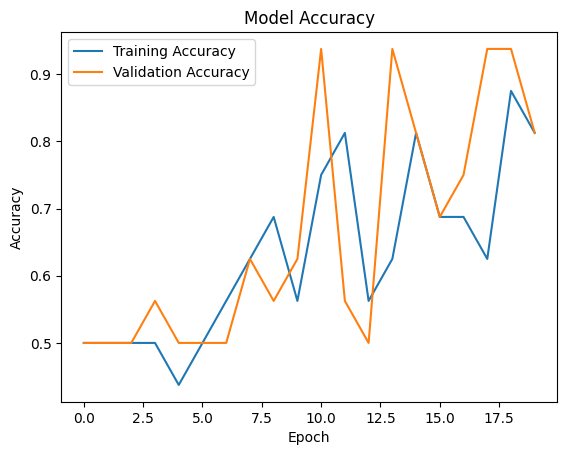

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Set Up the ImageDataGenerator for Training and Validation Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2    # Split the dataset into training and validation sets
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/iva min pro/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset=None  # Temporarily disable the subset
)

# If you still want validation, use a separate folder structure for validation images manually
# Create a separate validation directory with a similar structure as the train folder
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/iva min pro/images',  # Ensure a separate validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Step 2: Load the Pre-Trained ResNet50 Model without the Top Layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 3: Add Custom Layers for Activity Classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(2048, activation='relu')(x)  # Add more neurons
x = Dropout(0.5)(x)  # Add dropout to avoid overfitting
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Step 4: Create the Full Model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 5: Freeze the Pre-Trained Layers and Compile the Model
for layer in base_model.layers:
    layer.trainable = False  # Freeze the pre-trained layers

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Increase epochs
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


# Step 7: Fine-Tune the Model by Unfreezing Some Layers (Optional)
# Step 7: Fine-Tune the Model by Unfreezing Some Layers (Optional)
for layer in base_model.layers[-20:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Use 'learning_rate' instead of 'lr'
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training after fine-tuning
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Additional fine-tuning epochs
)

# Step 8: Save the Model
model.save('dog_activity_recognition_model.h5')

# Step 9: Visualize Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

# Check if the directory is correct and accessible
data_dir = '/content/drive/MyDrive/iva min pro/images'
if os.path.exists(data_dir):
    print(f"Directory exists: {data_dir}")
    print(f"Subdirectories: {os.listdir(data_dir)}")
else:
    print(f"Directory not found: {data_dir}")


Directory exists: /content/drive/MyDrive/iva min pro/images
Subdirectories: ['japanese_chin_199.jpg', 'japanese_chin_20.jpg', 'japanese_chin_23.jpg', 'japanese_chin_197.jpg', 'japanese_chin_39.jpg', 'japanese_chin_3.jpg', 'japanese_chin_60.jpg', 'japanese_chin_47.jpg', 'japanese_chin_51.jpg', 'japanese_chin_77.jpg', 'japanese_chin_62.jpg', 'japanese_chin_52.jpg', 'japanese_chin_72.jpg', 'japanese_chin_75.jpg', 'japanese_chin_71.jpg', 'japanese_chin_45.jpg', 'japanese_chin_46.jpg', 'japanese_chin_54.jpg', 'japanese_chin_55.jpg', 'japanese_chin_79.jpg', 'japanese_chin_64.jpg', 'japanese_chin_69.jpg', 'japanese_chin_67.jpg', 'japanese_chin_74.jpg', 'japanese_chin_49.jpg', 'japanese_chin_58.jpg', 'japanese_chin_76.jpg', 'japanese_chin_7.jpg', 'japanese_chin_73.jpg', 'japanese_chin_5.jpg', 'japanese_chin_57.jpg', 'japanese_chin_63.jpg', 'japanese_chin_68.jpg', 'japanese_chin_70.jpg', 'japanese_chin_44.jpg', 'japanese_chin_50.jpg', 'japanese_chin_61.jpg', 'japanese_chin_56.jpg', 'japanese_ch

In [ ]:
# Create the class directories

!mkdir -p /content/drive/MyDrive/iva\ min\ pro/images/sitting
!mkdir -p /content/drive/MyDrive/iva\ min\ pro/images/playing


In [ ]:
import os

data_dir = '/content/drive/MyDrive/iva min pro/images'
for root, dirs, files in os.walk(data_dir):
    print(f"Found directory: {root}")
    for file in files:
        print(file)


Found directory: /content/drive/MyDrive/iva min pro/images
japanese_chin_197.jpg
japanese_chin_39.jpg
japanese_chin_3.jpg
japanese_chin_60.jpg
japanese_chin_47.jpg
japanese_chin_51.jpg
japanese_chin_77.jpg
japanese_chin_62.jpg
japanese_chin_52.jpg
japanese_chin_72.jpg
japanese_chin_75.jpg
japanese_chin_71.jpg
japanese_chin_45.jpg
japanese_chin_46.jpg
japanese_chin_54.jpg
japanese_chin_55.jpg
japanese_chin_79.jpg
japanese_chin_64.jpg
japanese_chin_69.jpg
japanese_chin_67.jpg
japanese_chin_74.jpg
japanese_chin_49.jpg
japanese_chin_58.jpg
japanese_chin_76.jpg
japanese_chin_7.jpg
japanese_chin_73.jpg
japanese_chin_5.jpg
japanese_chin_57.jpg
japanese_chin_63.jpg
japanese_chin_68.jpg
japanese_chin_70.jpg
japanese_chin_44.jpg
japanese_chin_50.jpg
japanese_chin_61.jpg
japanese_chin_56.jpg
japanese_chin_42.jpg
japanese_chin_53.jpg
japanese_chin_78.jpg
japanese_chin_6.jpg
japanese_chin_66.jpg
japanese_chin_59.jpg
japanese_chin_48.jpg
japanese_chin_43.jpg
japanese_chin_65.jpg
keeshond_102.jpg
jap

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6875 - loss: 0.4891
Validation Loss: 0.4890574812889099
Validation Accuracy: 0.6875


In [ ]:
# Make predictions on the validation set
predictions = model.predict(validation_generator)



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
true_classes = validation_generator.classes
# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

# Print classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=validation_generator.class_indices.keys()))


Confusion Matrix:
[[5 3]
 [8 0]]
Classification Report:
              precision    recall  f1-score   support

     playing       0.38      0.62      0.48         8
     sitting       0.00      0.00      0.00         8

    accuracy                           0.31        16
   macro avg       0.19      0.31      0.24        16
weighted avg       0.19      0.31      0.24        16



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


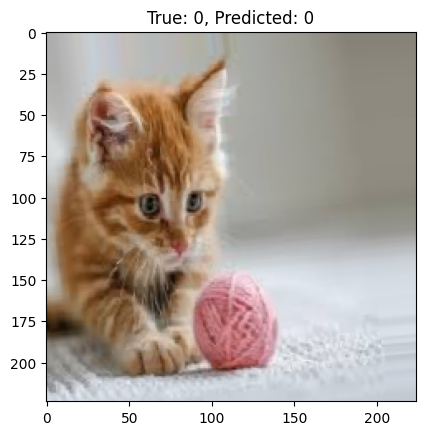

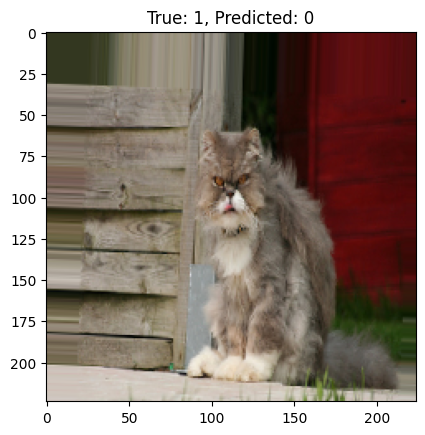

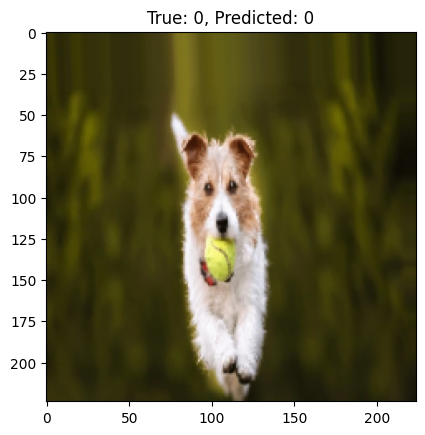

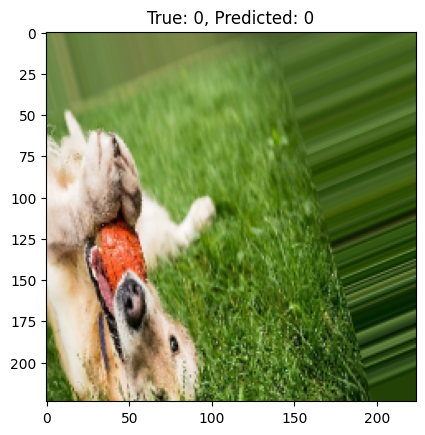

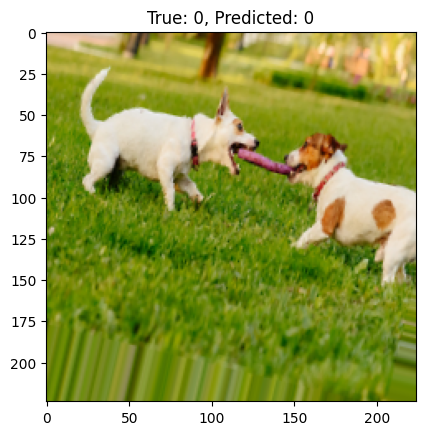

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of validation data
images, labels = next(validation_generator)

# Predict the class for each image
predictions = model.predict(images)

# Plot some images along with their predicted and true labels
for i in range(5):  # Adjust the number of images to visualize
    plt.imshow(images[i])
    plt.title(f"True: {np.argmax(labels[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Print class indices to verify the mapping
print(train_generator.class_indices)

# Reverse the dictionary to get class label from index
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Load an image from file
img_path = '/content/drive/MyDrive/iva min pro/images/sitting/pomeranian_173.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale like training images

# Step 2: Make a prediction
prediction = model.predict(img_array)

# Step 3: Get the class label
predicted_class = np.argmax(prediction)
predicted_class_label = class_labels[predicted_class]

# Step 4: Print the predicted class label
print(f"Predicted class: {predicted_class_label}")


{'playing': 0, 'sitting': 1}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Predicted class: sitting


Random forest


In [ ]:
pip install scikit-learn scikit-image opencv-python


In [ ]:
import os
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [ ]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os

# Path to your dataset
dataset_path = '/content/drive/MyDrive/iva min pro/images'

# Lists to hold image data and labels
data = []
labels = []

# Loop through each class folder and extract images
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (128, 128))  # Resize image

            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Extract HOG features from the grayscale image
            features = hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
            data.append(features)
            labels.append(class_folder)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Flatten the features if they are more than 2D
if data.ndim > 2:
    data = data.reshape(data.shape[0], -1)  # Flatten to 2D array

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)


accuracy = rf_classifier.score(X_test, y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 50.00%


In [ ]:

le = LabelEncoder()
labels = le.fit_transform(labels)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     playing       0.50      1.00      0.67         1
     sitting       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
[[1 0]
 [1 0]]


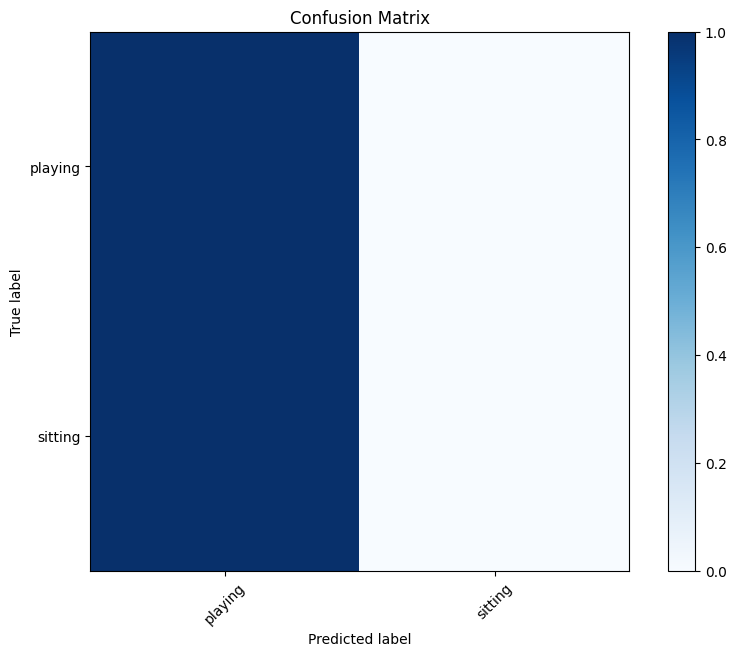

In [ ]:

print(classification_report(y_test, y_pred, target_names=le.classes_))


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


0.5
Model Accuracy: 50.00%


In [ ]:
import os

input_image_path = '/content/drive/MyDrive/iva min pro/images/playing/playing-5.jpg'

if os.path.exists(input_image_path):
    print("Image exists.")
else:
    print("Image does not exist. Please check the path.")


Image exists.


In [ ]:

model.summary()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = rf_classifier.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
[[1 0]
 [1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


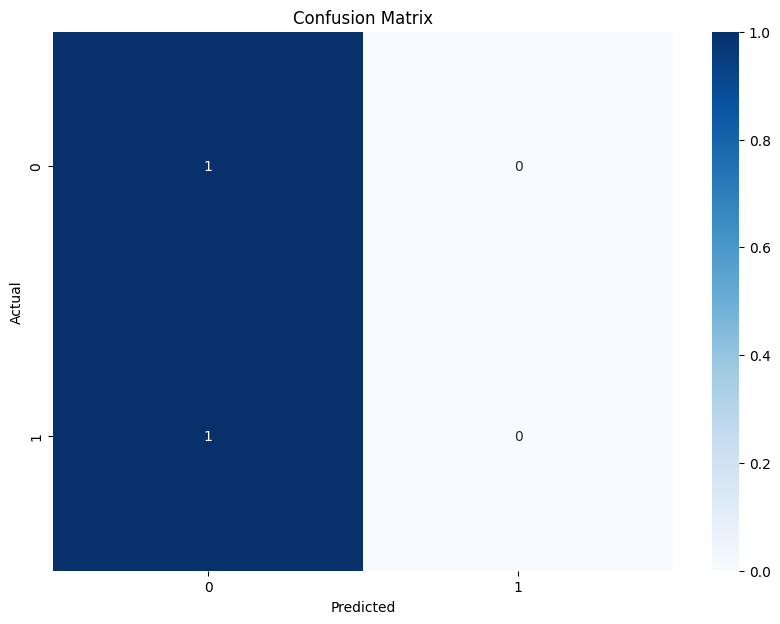

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_classifier, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
def predict_new_image(image_path):

    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    features = hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
    features = features.reshape(1, -1)

    # Make prediction
    prediction = rf_classifier.predict(features)
    return prediction[0]


new_image_path = '/content/drive/MyDrive/iva min pro/images/playing/playing-5.jpg'
predicted_class = predict_new_image(new_image_path)
print(f"Predicted class for the new image: {predicted_class}")


Predicted class for the new image: 0


**mobile net**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set dataset paths
train_data_dir = '/content/drive/MyDrive/iva min pro/images'
validation_data_dir = '/content/drive/MyDrive/iva min pro/images'

# Define parameters
image_size = (224, 224)
batch_size = 32
num_classes = 2  # Update according to the number of activities

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift
    height_shift_range=0.3,  # Increased height shift
    shear_range=0.3,  # Increased shear
    zoom_range=0.3,  # Increased zoom
    horizontal_flip=True,
    fill_mode='nearest')

# No augmentation for validation data, only rescaling
val_datagen = ImageDataGenerator(rescale=1./255)

# Load the train and validation data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Load MobileNet pretrained on ImageNet without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(512, activation='relu')(x)  # Reduced the number of units to 512
x = Dropout(0.5)(x)  # Added dropout to avoid overfitting
predictions = Dense(num_classes, activation='softmax')(x)  # Final classification layer

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base MobileNet model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  # Increased epochs, but with early stopping
    callbacks=[early_stopping])

# Unfreeze some layers for fine-tuning (optional)
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile and fine-tune the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5,
    callbacks=[early_stopping])  # Added early stopping during fine-tuning

# Save the trained model
model.save('pet_activity_mobilenet.h5')

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accuracy}')


Found 15 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5333 - loss: 0.6338 - val_accuracy: 0.6667 - val_loss: 0.5197
Epoch 2/10


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9000 - loss: 0.1410
Validation accuracy: 0.8999999761581421


In [ ]:
test_data_dir = '/content/drive/MyDrive/iva min pro/images'

# No augmentation for test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')


Found 10 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9000 - loss: 0.1410
Test accuracy: 0.8999999761581421


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Dictionary to map class indices to activity labels
class_labels = {0: 'playing', 1: 'sitting'}

def predict_single_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    # Make the prediction
    prediction = model.predict(img_array)

    # Get the class label
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted class index

    # Map predicted class index to activity label
    predicted_label = class_labels.get(predicted_class, "Unknown")

    return predicted_label

# Example usage
image_path = '/content/drive/MyDrive/iva min pro/images/sitting/pomeranian_173.jpg'
predicted_label = predict_single_image(image_path)

print(f'Predicted activity for the image: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted activity for the image: sitting
